**ANALISE DE ALUGUEL DE IMOVEIS**

**Objetivo**
- Identificar o Estado com maior quantidade de imoveis disponiveis para alugar e com base nisso avaliar os itens abaixo
- Identificar o valor médio, mediana e moda dos valores dos aluguéis
- Qual a imobiliaria que concentra maior quantidade de anuncios
- Qual a média de dias que o anuncio esta ativo

In [1]:
#Importando as bibliotecas que iremos usar

#Utilizado para as analise, manipulção de dados e estatistica básica
import pandas as pd 

#Criação de Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Trabalhar com datas
import datetime
from datetime import date

#Comando para exibir todas as colunas e linhas do arquivo
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings 
warnings.filterwarnings('ignore', category= DeprecationWarning)
warnings.filterwarnings('ignore', category= FutureWarning)

**1- COLETA DE DADOS**

In [2]:
#Carregando o Dataset
df_imoveis = pd.read_csv('C:/Users/lavin/Downloads/dataset.csv', encoding = 'ISO-8859-1', sep = ";", low_memory = False)

In [3]:
#Visualizando as primeiras linhas
df_imoveis.head(3)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332


**DICIONARIO DE DADOS** (Vamos traduzir o nome das colunas para o portugues para melhor entendimento):



**id** : Identificador do imovel

**category** : Categoria do imovel

**title** : Titulo do anuncio

**body** : Descrição do anuncio

**amenities**: Comunidades do imovel

**bathrooms**: Qtd Banheiros

**bedrooms**:  QTD Quartos   

**currency** : Moeda    

**fee** : Valor de taxas extras           

**has_photo**: Se o imovel possui foto

**pets_allowed**: Se o imovel possui pets  

**price**: Valor do aluguel mensal - Variavel TARGET

**price_display**: Valor do aluguel mensal exibido

**price_type**: Tipo de alugueç  

**square_feet**: Tamanho do imovel    

**cityname**: Cidade do imovel

**state**: Estado do Imovel

**latitude**: Latitude

**longitude**: Longitude

**source**: Tipo de Imobiliaria 

**time**: Hora que o anuncio foi lançado

In [4]:
#Visualizando as primeiras linhas do dataset
df_imoveis.head(3)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332


In [5]:
#Visualizando o rodapé do dataset
df_imoveis.tail(3)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",1325.0,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",931.0,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670
99491,5121218844,housing/rent/apartment,Large Remodeled Two BR 1. Five BA Apartment Home,This is a brand new 2 Beds 1. five Bathrooms A...,"Gated,Parking,Wood Floors",1.5,2.0,USD,No,Yes,NaN,1595.0,"$1,595",Monthly,900,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185659


In [6]:
df_imoveis.shape

(99492, 22)

In [7]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [8]:
df_imoveis.nunique()

id               99408
category             7
title            58503
body             94503
amenities         9827
bathrooms           16
bedrooms            10
currency             1
fee                  2
has_photo            3
pets_allowed         4
price             3687
price_display     3718
price_type           3
square_feet       2538
address           7771
cityname          2979
state               51
latitude          7212
longitude         7270
source              25
time             75360
dtype: int64

In [9]:
df_imoveis.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [10]:
df_imoveis.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [11]:
#Visualizando linhas duplicadas
df_imoveis[df_imoveis.duplicated()]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
41958,5508806580,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2.0,2.0,USD,No,Yes,"Cats,Dogs",1335.0,"$1,335",Monthly,1084,NaN,Las Vegas,NV,36.1536,-115.1965,RentDigs.com,1568754086
41959,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1.0,1.0,USD,No,Yes,"Cats,Dogs",1331.0,"$1,331",Monthly,738,NaN,Northglenn,CO,39.8999,-104.9442,RentDigs.com,1568754072
41960,5508806391,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3.0,USD,No,Yes,NaN,1320.0,"$1,320",Monthly,943,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754069
41961,5508806299,housing/rent/apartment,"District Heights, prime location Two BR, Apart...",Income Requirement: Must have 2. 5x the rent i...,Parking,1.0,2.0,USD,No,Yes,NaN,1349.0,"$1,349",Monthly,931,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754061
41962,5508806233,housing/rent/apartment,"Spacious One BR, One BA","Square footage: 680 sq-ft, unit number: 122. P...","Basketball,Gym,Patio/Deck,Playground,Pool",1.0,1.0,USD,No,Yes,NaN,1260.0,"$1,260",Monthly,680,NaN,Denver,CO,39.8999,-104.9442,RentDigs.com,1568754056
41963,5508806180,housing/rent/apartment,Beautiful Thornton Apartment for rent,"Square footage: 827 sq-ft, unit number: 2034. ...","AC,Basketball,Clubhouse,Dishwasher,Fireplace,G...",1.0,1.0,USD,No,Yes,NaN,1203.0,"$1,203",Monthly,827,NaN,Thornton,CO,39.8999,-104.9442,RentDigs.com,1568754052
41964,5508806119,housing/rent/apartment,"Bright District Heights, One BR, One BA for re...",Thanks for your interest in Rochelle Hall Apar...,Parking,1.0,1.0,USD,No,No,NaN,950.0,$950,Monthly,523,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754048
41965,5508806034,housing/rent/apartment,Los Angeles - 2bd/Two BA 966sqft Apartment for...,"Welcome to Cole, a newly constructed Wiseman c...",Gym,2.0,2.0,USD,No,Yes,NaN,3095.0,"$3,095",Monthly,966,NaN,Los Angeles,CA,34.0911,-118.3430,RentDigs.com,1568754041
41966,5508805994,housing/rent/apartment,"$3,850/mo - must see to believe.","Welcome to Cole, a newly constructed Wiseman c...",Gym,3.0,3.0,USD,No,Yes,NaN,3850.0,"$3,850",Monthly,1318,NaN,Los Angeles,CA,34.0911,-118.3430,RentDigs.com,1568754037
41967,5508805990,housing/rent/apartment,Apartment \ Two BA - ready to move in. Pet OK!,"Square footage: 1093 sq. feet, unit number: 13...","AC,Cable or Satellite,Clubhouse,Dishwasher,Fir...",2.0,2.0,USD,No,Yes,"Cats,Dogs",1620.0,"$1,620",Monthly,1093,NaN,Denver,CO,39.8999,-104.9442,RentDigs.com,1568754037


In [12]:
#Contando as linhas duplicadas para ver se eu vou poder excluir
duplicadas = df_imoveis.duplicated()
duplicadas.sum()

np.int64(84)

**O nosso dataframe possui 84 linhas duplicadas, nós vamos poder excluir elas por não serem muitas linhas**

In [13]:
#Removendo as linhas duplicadas do Dataframe
df_imoveis.drop_duplicates(inplace = True)

In [14]:
#verificando se ainda a linhas duplicadas no dataframe
df_imoveis[df_imoveis.duplicated()]


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time


**2- ANALISE E TRATAMENTO DOS DADOS**

In [15]:
#Vou trocar os nomes das colunas para portugues para melhor entendimento 
df_imoveis.columns = ['ID_Imovel',
                'Categoria',
                'Titulo',
                'Descricao',
                'Comodidades',
                'Banheiros',
                'Quartos',
                'Moeda',
                'Taxa',
                'Foto_Anuncio',
                'Permite_Pets',
                'VL_Aluguel',
                'VL_Aluguel_Exibido',
                'Tipo_Aluguel',
                'Tamanho',
                'Endereco',
                'Cidade',
                'Estado',
                'Latitude',
                'Longitude',
                'Imobiliaria',
                'Inclusao']
df_imoveis.head(3)

,ID_Imovel,Categoria,Titulo,Descricao,Comodidades,Banheiros,Quartos,Moeda,Taxa,Foto_Anuncio,Permite_Pets,VL_Aluguel,VL_Aluguel_Exibido,Tipo_Aluguel,Tamanho,Endereco,Cidade,Estado,Latitude,Longitude,Imobiliaria,Inclusao
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332


**De acordo com o nosso objetivo nós podemos deixar de lado algumas colunas que não são relevantes para a nossa analise**

In [16]:
#Vou considerar apenas as variaveis abaixo

columns = ('ID_Imovel','Categoria', 'Imobiliaria', 'Estado', 'Latitude', 'Longitude', 'Inclusao', 'Banheiros',
           'Quartos', 'Comodidades', 'Taxa', 'Tamanho', 'VL_Aluguel')

#Criando um novo Dataframe só com as colunas acima
df_aluguel = pd.DataFrame(df_imoveis, columns = columns)
df_aluguel.head()

,ID_Imovel,Categoria,Imobiliaria,Estado,Latitude,Longitude,Inclusao,Banheiros,Quartos,Comodidades,Taxa,Tamanho,VL_Aluguel
0,5668640009,housing/rent/apartment,RentLingo,CA,33.8520,-118.3759,1577360355,1.0,1.0,NaN,No,542,2195.0
1,5668639818,housing/rent/apartment,RentLingo,VA,37.0867,-76.4941,1577360340,1.5,3.0,NaN,No,1500,1250.0
2,5668639686,housing/rent/apartment,RentLingo,NC,35.8230,-78.6438,1577360332,2.0,3.0,NaN,No,1650,1395.0
3,5668639659,housing/rent/apartment,RentLingo,CA,38.3622,-121.9712,1577360330,1.0,2.0,NaN,No,820,1600.0
4,5668639374,housing/rent/apartment,RentLingo,NM,35.1038,-106.6110,1577360308,1.0,1.0,NaN,No,624,975.0


In [17]:
#Visualizando o tamanho do dataframe
df_aluguel.shape

(99408, 13)

In [18]:
#Verificando os valores nulos desse dataframe
df_aluguel.isnull().sum()

ID_Imovel          0
Categoria          0
Imobiliaria        0
Estado           302
Latitude          25
Longitude         25
Inclusao           0
Banheiros         63
Quartos          124
Comodidades    16034
Taxa               0
Tamanho            0
VL_Aluguel         1
dtype: int64

**Na nossa analise o objetivo principal é identificar o Estado com maior quantidade de imoveis disponiveis para alugar,
porem na coluna de estado existem valores nulos. Por isso, nós iremos excluir os valores nulos da coluna 'Estado'.**

In [19]:
#Excluindo as linhas vazias da coluna Estado
df_aluguel.dropna(subset = ['Estado'], how = 'all', inplace = True)
df_aluguel.isnull().sum()

ID_Imovel          0
Categoria          0
Imobiliaria        0
Estado             0
Latitude           0
Longitude          0
Inclusao           0
Banheiros         59
Quartos          124
Comodidades    15899
Taxa               0
Tamanho            0
VL_Aluguel         1
dtype: int64

**- Quantidade de anuncios por estados:**

In [20]:
#Agrupamento para verificar qual estado tem a maior quantidade de imoveis disponiveis para alugar
contagem_estados = df_aluguel['Estado'].value_counts()
print(contagem_estados)

Estado
TX    11250
CA    10301
VA     8278
NC     6293
CO     6279
FL     5773
MD     5276
MA     5023
OH     4899
GA     4750
NJ     4444
NV     2813
WA     2595
AZ     2376
LA     1345
MO     1203
PA     1122
TN     1114
IL     1036
NE     1020
KY      995
OK      934
SC      908
KS      899
UT      809
ND      743
NH      735
MI      710
NY      659
AR      598
MN      581
IN      509
CT      509
WI      430
IA      372
AL      354
OR      277
VT      125
RI      119
MS      107
ID       96
DC       93
MT       87
SD       86
AK       58
ME       32
HI       31
NM       24
WY       16
WV       13
DE        7
Name: count, dtype: int64


**O estado com mais imoveis disponiveis para alugar é o Texas com 11250 anuncios**

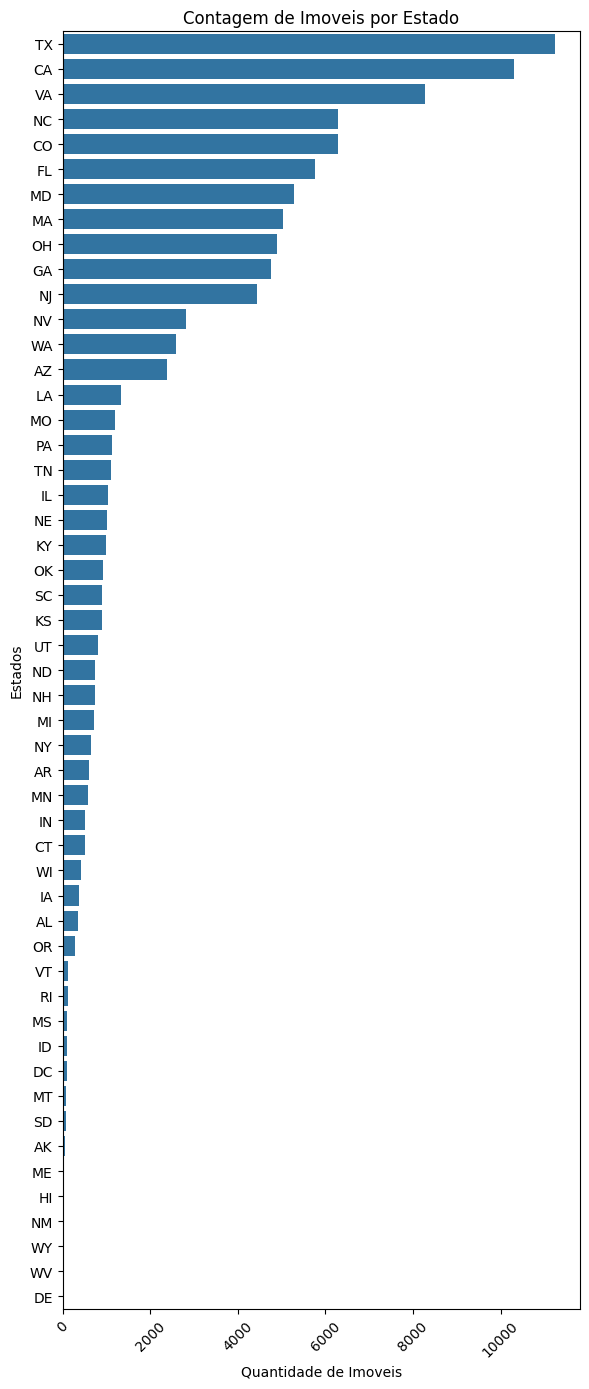

In [21]:
#Gerando um Gráfico para melhor visualização
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (6.00, 14.00)

sns.barplot(x =contagem_estados.values, y= contagem_estados.index)

plt.title('Contagem de Imoveis por Estado')
plt.xlabel('Quantidade de Imoveis')
plt.ylabel('Estados')
plt.xticks (rotation = 45)

plt.savefig('Estados.png' , format = 'png')
plt.show()

In [22]:
#Criando um dataframe só com o estado do Texas que é o com mais imoveis disponiveis
df_texas = df_aluguel[df_aluguel['Estado'] == 'TX']
df_texas.head()

,ID_Imovel,Categoria,Imobiliaria,Estado,Latitude,Longitude,Inclusao,Banheiros,Quartos,Comodidades,Taxa,Tamanho,VL_Aluguel
16,5668636291,housing/rent/apartment,RentLingo,TX,29.4624,-98.5253,1577360099,1.0,1.0,NaN,No,800,729.0
21,5668632369,housing/rent/apartment,RentLingo,TX,30.3054,-97.7497,1577359827,1.0,1.0,"Fireplace,Gym,Parking,Pool,Storage,Wood Floors",No,650,1060.0
22,5668632002,housing/rent/apartment,RentLingo,TX,30.5118,-97.6873,1577359796,1.0,1.0,"Gated,Pool",No,797,1003.0
23,5668631854,housing/rent/apartment,RentLingo,TX,30.3054,-97.7497,1577359784,1.0,1.0,"Dishwasher,Parking,Pool",No,444,837.0
24,5668631790,housing/rent/apartment,RentLingo,TX,30.3054,-97.7497,1577359778,1.0,1.0,"Dishwasher,Parking,Pool",No,692,1020.0


In [23]:
#Vendo se ainda possuimos valores nulos
df_texas.isnull().sum()

ID_Imovel         0
Categoria         0
Imobiliaria       0
Estado            0
Latitude          0
Longitude         0
Inclusao          0
Banheiros        16
Quartos           5
Comodidades    1708
Taxa              0
Tamanho           0
VL_Aluguel        0
dtype: int64

**- Tratando valores nulos no dataframe texas**

In [24]:
#Vou preencher os valores nulos com a média de valores da sua coluna
media_quartos = df_texas['Quartos'].fillna(df_texas['Quartos'].mean(), inplace = True)


C:\Users\lavin\AppData\Local\Temp\ipykernel_12092\3945847492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_quartos = df_texas['Quartos'].fillna(df_texas['Quartos'].mean(), inplace = True)


In [25]:
#Preenchendo o valores nulos da coluna banheiro utilizando a média dos valores dessa coluna
df_texas['Banheiros'].fillna(df_texas['Banheiros'].mean(), inplace = True)


C:\Users\lavin\AppData\Local\Temp\ipykernel_12092\801570371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Banheiros'].fillna(df_texas['Banheiros'].mean(), inplace = True)


In [26]:
df_texas.isnull().sum()

ID_Imovel         0
Categoria         0
Imobiliaria       0
Estado            0
Latitude          0
Longitude         0
Inclusao          0
Banheiros         0
Quartos           0
Comodidades    1708
Taxa              0
Tamanho           0
VL_Aluguel        0
dtype: int64

In [27]:
#Visualizando a quantidade de linhas e a quantidade de colunas do novo dataframe
df_texas.shape

(11250, 13)

**- Média, Moda e Mediana dos alugueis do Texas:**

In [28]:
#Visualizando a média dos alugueis no texas

#Uso a função 'round' para arredondar o valor
media_alugueis = round(df_texas['VL_Aluguel'].mean(),2)
print(f'A média dos alugueis no Texas é de {media_alugueis} USD')

A média dos alugueis no Texas é de 1217.5 USD


In [29]:
#Visualizando a moda dos alugueis no Texas

#Depois do .mode() eu coloquei [0] para a função trazer apenas o primeiro valor da moda sem mais informações
moda_alugueis = round(df_texas['VL_Aluguel'].mode()[0], 2)
print(f'A moda dos alugueis no Texas é de {moda_alugueis} USD')

A moda dos alugueis no Texas é de 975.0 USD


In [30]:
#Visualizando a mediana dos alugueis no Texas
mediana_alugueis = round(df_texas['VL_Aluguel'].median(), 2)
print(f'A mediana dos alugueis no Texas é de {mediana_alugueis} USD')

A mediana dos alugueis no Texas é de 1140.0 USD


- **MÉDIA:** 1217.63 USD
- **MODA:** 975.0 USD
- **MEDIANA:** 1140.0 USD

**- Imobiliarias**

In [31]:
#Agora eu vou descobrir qual a imobiliaria que concentra maior quantidade de anuncios

imobiliarias = df_texas['Imobiliaria'].value_counts()
print(imobiliarias)


print(f'\nA imobiliaria com maior quantidade de anuncios é a {imobiliarias.idxmax()}')

Imobiliaria
RentDigs.com    9653
RentLingo       1411
GoSection8       102
ListedBuy         35
RealRentals       26
tenantcloud        8
RENTCafé           6
Listanza           3
RENTOCULAR         2
Claz               2
RentFeeder         1
SpreadMyAd         1
Name: count, dtype: int64

A imobiliaria com maior quantidade de anuncios é a RentDigs.com


Text(0, 0.5, 'Imobiliarias')

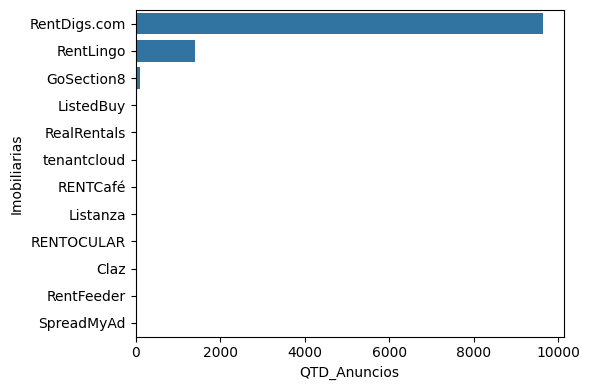

In [32]:
#Criando um grafico para melhor visualização

plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (6.00, 4.00)

sns.barplot(x = imobiliarias.values, y = imobiliarias.index)

plt.title = ('Imobiliarias com mais anuncios no Texas')
plt.xlabel('QTD_Anuncios')
plt.ylabel('Imobiliarias')

**A imobiliaria com maior quantidade de anuncios é a RentDigs.com**

**- Média de dias que o anuncio esta ativo**

In [43]:
#Criando uma coluna que mostre a data do anuncio ('Data_Inclusao)
def convert_data(x):
    return date.fromtimestamp(x)
df_texas['Data_Inclusao'] = df_texas['Inclusao'].apply(convert_data)
df_texas['Data_Inclusao'] = pd.to_datetime(df_texas['Data_Inclusao'])
df_texas.head(2)

C:\Users\lavin\AppData\Local\Temp\ipykernel_12092\3403384368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Data_Inclusao'] = df_texas['Inclusao'].apply(convert_data)
C:\Users\lavin\AppData\Local\Temp\ipykernel_12092\3403384368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Data_Inclusao'] = pd.to_datetime(df_texas['Data_Inclusao'])


,ID_Imovel,Categoria,Imobiliaria,Estado,Latitude,Longitude,Inclusao,Banheiros,Quartos,Comodidades,Taxa,Tamanho,VL_Aluguel,Data_Inclusao
16,5668636291,housing/rent/apartment,RentLingo,TX,29.4624,-98.5253,1577360099,1.0,1.0,NaN,No,800,729.0,2019-12-26
21,5668632369,housing/rent/apartment,RentLingo,TX,30.3054,-97.7497,1577359827,1.0,1.0,"Fireplace,Gym,Parking,Pool,Storage,Wood Floors",No,650,1060.0,2019-12-26


In [46]:
#Extraindo Ano
df_texas['Ano'] = df_texas['Data_Inclusao'].dt.year

#Criando data atual para ver a quantidade de dias e anos que o anuncio esta ativo
data_atual = datetime.datetime.now()

#Variavel para vermos quantos anos o anucio esta ativo
df_texas['Anos_Anuncio'] = (data_atual.year - df_texas['Ano'])

#Variavel para vermos quantos dias o anuncio esta ativo
df_texas['Dias_Anuncio'] = (data_atual - df_texas['Data_Inclusao']).dt.days

df_texas.head()

C:\Users\lavin\AppData\Local\Temp\ipykernel_12092\3704748322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Ano'] = df_texas['Data_Inclusao'].dt.year
C:\Users\lavin\AppData\Local\Temp\ipykernel_12092\3704748322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['Anos_Anuncio'] = (data_atual.year - df_texas['Ano'])
C:\Users\lavin\AppData\Local\Temp\ipykernel_12092\3704748322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,ID_Imovel,Categoria,Imobiliaria,Estado,Latitude,Longitude,Inclusao,Banheiros,Quartos,Comodidades,Taxa,Tamanho,VL_Aluguel,Data_Inclusao,Ano,Anos_Anuncio,Dias_Anuncio
16,5668636291,housing/rent/apartment,RentLingo,TX,29.4624,-98.5253,1577360099,1.0,1.0,NaN,No,800,729.0,2019-12-26,2019,6,1903
21,5668632369,housing/rent/apartment,RentLingo,TX,30.3054,-97.7497,1577359827,1.0,1.0,"Fireplace,Gym,Parking,Pool,Storage,Wood Floors",No,650,1060.0,2019-12-26,2019,6,1903
22,5668632002,housing/rent/apartment,RentLingo,TX,30.5118,-97.6873,1577359796,1.0,1.0,"Gated,Pool",No,797,1003.0,2019-12-26,2019,6,1903
23,5668631854,housing/rent/apartment,RentLingo,TX,30.3054,-97.7497,1577359784,1.0,1.0,"Dishwasher,Parking,Pool",No,444,837.0,2019-12-26,2019,6,1903
24,5668631790,housing/rent/apartment,RentLingo,TX,30.3054,-97.7497,1577359778,1.0,1.0,"Dishwasher,Parking,Pool",No,692,1020.0,2019-12-26,2019,6,1903


In [50]:
#Média de dias que o anuncio esta ativo
media_dias = round(df_texas['Dias_Anuncio'].mean())

print(f'A média de dias que o anuncio esta ativo é de {media_dias} dias')

A média de dias que o anuncio esta ativo é de 2098 dias


**A média de dias que o anuncio esta ativo é de 2098 dias**

# Objetivo
- Identificar o Estado com maior quantidade de imoveis disponiveis para alugar e com base nisso avaliar os itens abaixo


  R: **O estado com mais imoveis disponiveis para alugar é o Texas com 11250 anuncios**

- Identificar o valor médio, mediana e moda dos valores dos aluguéis


  R: **MÉDIA: 1217.63 USD**


  **MODA: 975.0 USD**


  **MEDIANA: 1140.0 USD**

- Qual a imobiliaria que concentra maior quantidade de anuncios?


  R: **A imobiliaria com maior quantidade de anuncios é a RentDigs.com**

- Qual a média de dias que o anuncio esta ativo?


  R: **A média de dias que o anuncio esta ativo é de 2098 dias**